# COMM 4P35 - Web Archives Tutorial


## Part 1 - Analyzing changes to Canada.ca pages

This notebook uses a subset of the the data from the [COVID in Niagara Archive](https://archive-it.org/collections/13781). We'll use Google Collab to explore how some pages from the [canada.ca](https://canada.ca) domain have changed during the course of the pandemic.


In [1]:
# Loading in the the pieces

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

from textblob import TextBlob
import nltk


import difflib
from IPython import display

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
%matplotlib inline

/Users/tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias fo

### Step 1.

We'll load up the CSV file of data that represents our crawls of the canada.ca pages. We'll add some extra processing:

- We calculate the length of each entry, and add as a new column
- We calculate the sentiment of each entry, and as two new columns

and randomly display one row of this spreadsheet.

In [9]:

#Open up the CSV file fo data
web_page_text = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/ARCH_Data_Explore/main/snap_shot_canada_ca.csv")


#Make sure the date column is treated as a Date
web_page_text['crawl_date']= pd.to_datetime(web_page_text['crawl_date'],format='%Y%m%d')


#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in web_page_text.iterrows():
    web_page_text.at[index, "length"] = len(web_page_text.at[index,"content"])
    
    
    
##add two extra columns to the date that shows the calculated 'sentiment' of the entries

polarity = []
subjectivity = []


for entry in web_page_text.content:
    #print(day,"\n")
    score = TextBlob(entry)
    polarity.append(score.sentiment.polarity)
    subjectivity.append(score.sentiment.subjectivity)
    
web_page_text['polarity'] = polarity
web_page_text['subjectivity'] = subjectivity

    
    
    
# A random 'sample' of 1 record
web_page_text.sample(1)

crawl_date     domain  \
271 2020-07-31  canada.ca   

                                                                                                                                                                            url  \
271  https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html?utm_campaign=not-applicable&utm_medium=vanity-url&utm_source=canada-ca_covid-19   

    mime_type_web_server mime_type_tika language  \
271  text/html            text/html      en        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [10]:
print("Total number of web pages captures in this archive subset: " + str(len(web_page_text)))

Total number of web pages captures in this archive subset: 1345


## Step 2 

Let's look at how many times the top 25 URLs in this archive have been crawled. 

In [11]:
web_page_text.groupby(["url"]).count().sort_values(by="crawl_date",ascending=False)[0:25]

,crawl_date,domain,mime_type_web_server,mime_type_tika,language,content,length,polarity,subjectivity
url,,,,,,,,,
https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html,71,71,71,71,71,71,71,71,71
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html,70,70,70,70,70,70,70,70,70
https://www.canada.ca/en/department-finance/economic-response-plan.html,69,69,69,69,69,69,69,69,69
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/symptoms.html,68,68,68,68,68,68,68,68,68
https://www.canada.ca/en.html,68,68,68,68,68,68,68,68,68
https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks.html,66,66,66,66,66,66,66,66,66
https://www.canada.ca/en/department-finance/news/2020/03/canadas-covid-19-economic-response-plan-support-for-canadians-and-businesses.html,66,66,66,66,66,66,66,66,66
https://www.canada.ca/en/crown-indigenous-relations-northern-affairs.html,65,65,65,65,65,65,65,65,65
https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html?utm_campaign=not-applicable&utm_medium=vanity-url&utm_source=canada-ca_covid-19,55,55,55,55,55,55,55,55,55


## Step 3

Let's look at a specific URL... We set it in the next cell

In [12]:
URL = "https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html"

... with that set, let's plot out the change in content length of that page

/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/tim/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


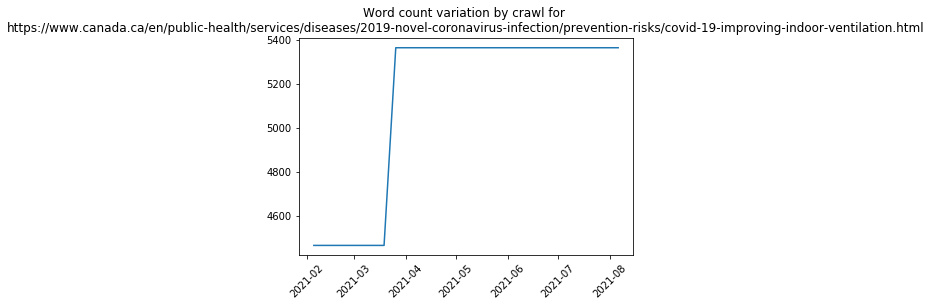

In [13]:
url_data = web_page_text[web_page_text['url'] == URL].sort_values(by="crawl_date")

plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for \n" + URL)
plt.show()


### Step 4

Curious. We see a huge step in page length.

Let's open up both version of this page on the Internet Archive and see if we can spot the difference in the pages.


In [14]:
max_page = url_data[url_data['length'] == url_data['length'].max()]
max_page_date = str(max_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nLongest version of this page on the Internet Archive was captured "\
      + max_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + max_page_date + "/" + URL)



min_page = url_data[url_data['length'] == url_data['length'].min()]
min_page_date = str(min_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nShortest version of this page on the Internet Archive was captured "\
      + min_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + min_page_date + "/" + URL)




Longest version of this page on the Internet Archive was captured 20210326
Open this version on Internet Archive 
https://web.archive.org/web/20210326/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html


Shortest version of this page on the Internet Archive was captured 20210205
Open this version on Internet Archive 
https://web.archive.org/web/20210205/https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks/covid-19-improving-indoor-ventilation.html


### Step 5 - Graphing Changes in Sentiment

Let's map out the changes in sentiment scores as we move across different page lengths for this specific URL


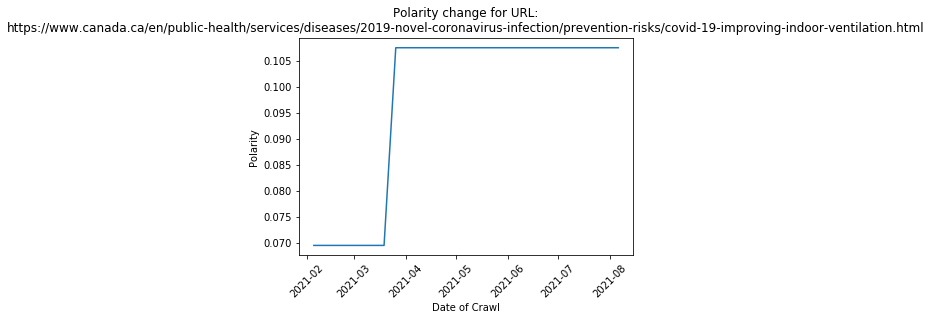

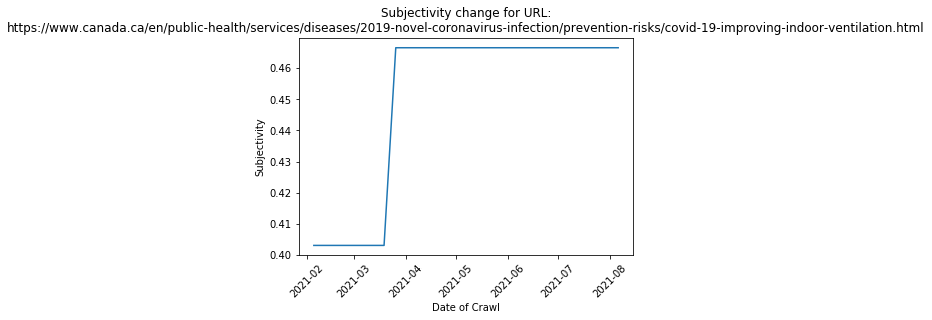

In [33]:
plt.plot(url_data['crawl_date'],url_data['polarity'])
plt.xticks(rotation=45)
plt.title("Polarity change for URL:\n"+URL)
plt.ylabel("Polarity")
plt.xlabel("Date of Crawl")
plt.show()


plt.plot(url_data['crawl_date'],url_data['subjectivity'])
plt.xticks(rotation=45)
plt.title("Subjectivity change for URL:\n"+URL)
plt.ylabel("Subjectivity")
plt.xlabel("Date of Crawl")
plt.show()


### Step 6 - Sentiment of our longest and shortest entry

Let's compare these two dimensions for the *Longest Length* page and the *Shortest Length* page.

Longest entry: Sentiment(polarity=0.10752131099353301, subjectivity=0.4665490887713099)
Shortest entry: Sentiment(polarity=0.06947916666666676, subjectivity=0.403095238095238)


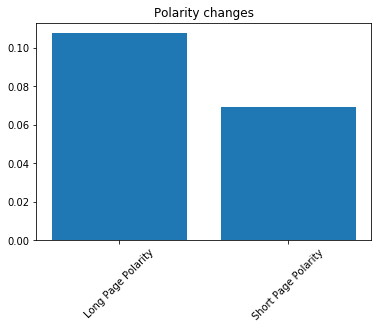

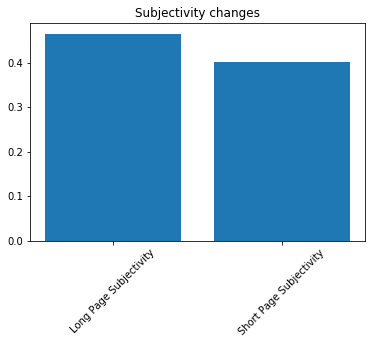

In [15]:

max_page_sa = TextBlob(str(max_page['content'])).sentiment
min_page_sa = TextBlob(str(min_page['content'])).sentiment

print("Longest entry: " + str(max_page_sa))
print("Shortest entry: " + str(min_page_sa))

plt.title("Polarity changes")
plt.bar(['Long Page Polarity', 'Short Page Polarity'],[max_page_sa.polarity,min_page_sa.polarity])
plt.xticks(rotation=45)
plt.show()

plt.title("Subjectivity changes")
plt.bar(['Long Page Subjectivity','Short Page Subjectivity'],[max_page_sa.subjectivity,min_page_sa.subjectivity])
plt.xticks(rotation=45)
plt.show()


What differences can you note in these two versions of the same page?

## Part 2 - Run your own analysis

We'll now look at a selection of pages from a different domain in that dataset. Here we will use [ontario.ca](https://ontario.ca)


In [ ]:
P2_web_page_text = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/ARCH_Data_Explore/main/snap_shot_ontario_ca.csv")
P2_web_page_text.dropna(inplace=True)

In [ ]:
P2_web_page_text['crawl_date']= pd.to_datetime(P2_web_page_text['crawl_date'],format='%Y%m%d')
#add an extra column with how the length of each crawl. Useful for later calculations
for index, row in P2_web_page_text.iterrows():
    P2_web_page_text.at[index, "length"] = len(P2_web_page_text.at[index,"content"])
    
P2_web_page_text.sample(1)

Top 25 URLs crawled in this Archive

In [ ]:
P2_web_page_text.groupby(["url"]).count().sort_values(by="crawl_date",ascending=False)[0:25]

Try to find and interesting URL in the list you just created that shows some changes in page length. You can experiment by setting the `P2_URL` variable in the next cell to that URL.

In [ ]:
P2_URL = ""

In [ ]:
P2_url_data = P2_web_page_text[P2_web_page_text['url'] == P2_URL].sort_values(by="crawl_date")

#Plot out Word counts of crawls
plt.plot(P2_url_data['crawl_date'],P2_url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for \n" + P2_URL)
plt.show()


#Find longest and shortest page
P2_max_page = P2_url_data[P2_url_data['length'] == P2_url_data['length'].max()]
P2_max_page_date = str(P2_max_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nLongest version of this page on the Internet Archive was captured "\
      + P2_max_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + P2_max_page_date + "/" + P2_URL)


P2_min_page = P2_url_data[P2_url_data['length'] == P2_url_data['length'].min()]
P2_min_page_date = str(P2_min_page['crawl_date'].values[0]).split('T')[0].replace('-','')


print("\n\nShortest version of this page on the Internet Archive was captured "\
      + P2_min_page_date + "\n" \
      + "Open this version on Internet Archive \n"
      + "https://web.archive.org/web/" \
      + P2_min_page_date + "/" + P2_URL)


#Graph Sentiment
P2_max_page_sa = TextBlob(str(P2_max_page['content'])).sentiment
P2_min_page_sa = TextBlob(str(P2_min_page['content'])).sentiment

print("\n")
print("Longest entry: " + str(P2_max_page_sa))
print("Shortest entry: " + str(P2_min_page_sa))

plt.title("Polarity changes")
plt.bar(['Long Page Polarity', 'Short Page Polarity'],[P2_max_page_sa.polarity,P2_min_page_sa.polarity])
plt.xticks(rotation=45)
plt.show()

plt.title("Subjectivity changes")
plt.bar(['Long Page Subjectivity','Short Page Subjectivity'],[P2_max_page_sa.subjectivity,P2_min_page_sa.subjectivity])
plt.xticks(rotation=45)
plt.show()

Describe the changes you see in the page between the shortest and longest version